In [1]:
import torch
from torch import nn, optim # 神经网络+优化函数
import matplotlib.pyplot as plt
from time import perf_counter

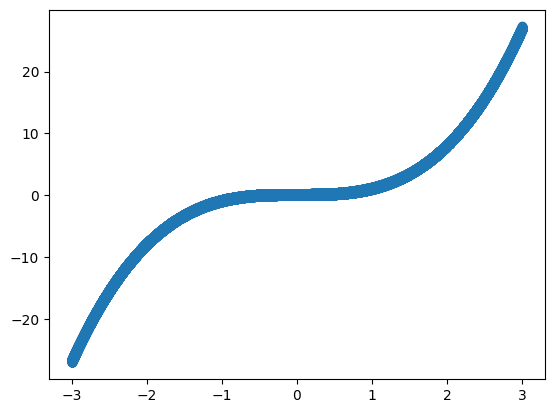

In [2]:
x = torch.linspace(-3, 3, 100000)
x = x.unsqueeze(dim=1) # 1维数据转化为2维
y = x.pow(3)+0.3*torch.rand(x.size())
plt.scatter(x.numpy(), y.numpy())
plt.show()

## ReLU函数-拟合复杂非线性函数
$f(x)=\begin{cases}
0&x \le 0\\
x&x>0
\end{cases}$

In [3]:
class Net(nn.Module):
    def __init__(self, input_feature, num_hidden, outputs, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.hidden = nn.Linear(input_feature, num_hidden)
        self.out = nn.Linear(num_hidden, outputs)

    def forward(self, x):
        x = nn.functional.relu(self.hidden(x)) # ReLU
        x = self.out(x)
        return x

In [4]:
net = Net(input_feature=1, num_hidden=20, outputs=1)
inputs = x
target = y
if torch.cuda.is_available():
    net = net.cuda()
    inputs = inputs.cuda()
    target = target.cuda()

optimizer = optim.SGD(net.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [5]:
def draw(output, loss):
    plt.cla()
    plt.scatter(x.numpy(), y.numpy())
    plt.plot(x.numpy(), output.data.numpy(), 'r-', lw=5)
    plt.xlabel(f"loss={loss.item()}", fontdict={'size': 20, 'color': 'red'})
    # plt.text(1.50, 0, s=f"loss={loss.item()}", fontdict={'size': 20, 'color': 'red'})
    plt.pause(0.005)

def train(inputs, target, model, criterion, optimizer, epochs):
    output = None
    loss = None
    for epoch in range(epochs):
        output = model(inputs)
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if output is not None and loss is not None:
        draw(output.cpu(), loss)
    return model, loss


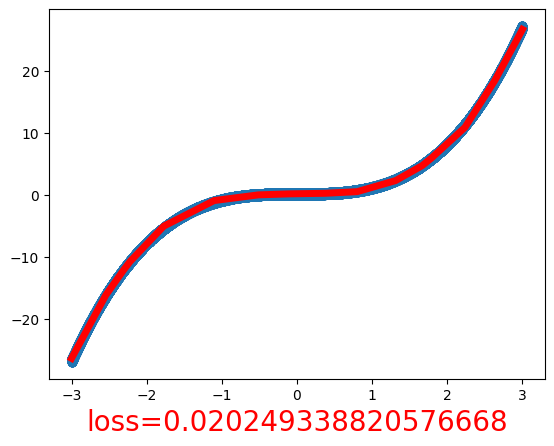

calculate time: 12.053721399999631
final loss:0.020249338820576668
weights: [Parameter containing:
tensor([[-1.2196],
        [-0.6450],
        [-0.2443],
        [ 1.5956],
        [ 1.4462],
        [ 0.8283],
        [-0.2572],
        [-1.1787],
        [-1.8180],
        [ 1.1397],
        [-0.2268],
        [ 1.2609],
        [-0.9545],
        [ 1.8316],
        [ 0.7232],
        [-1.7952],
        [-0.2990],
        [-0.3345],
        [ 0.0254],
        [-1.3703]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-2.7174, -1.5126, -0.6461, -1.2728, -1.8906, -1.4743, -0.1477, -0.6214,
        -3.2278, -2.9908,  0.1085, -2.0909, -0.1597, -4.0893, -0.2429, -1.9853,
         0.8965,  1.0032, -0.9886, -3.4895], device='cuda:0',
       requires_grad=True), Parameter containing:
tensor([[-2.8991, -1.5421, -0.6936,  1.7961,  2.2853,  1.5985, -0.2368, -0.9246,
         -3.6160,  3.0719,  0.0765,  2.3704, -0.3010,  4.3033,  0.5880, -2.5628,
         -0.2386, -0.3037,

In [6]:
start = perf_counter()
net, loss = train(inputs, target, net, criterion, optimizer, 10000)
end = perf_counter()
print(f"calculate time: {end-start}")
print(f"final loss:{loss.item()}")
print("weights:", list(net.parameters()))